# **Model Evaluation and Refinement**

 - Use training, testing and cross validation to improve the performance of the dataset. 
 - Identify the point of overfitting of a model
 - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
 - Use Grid Search to identify the best performing model using different hyperparameters


In [2]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [3]:
laptop_data=pd.read_csv('datasets/laptop_pricing_dataset_mod2.csv')
laptop_data.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [4]:
laptop_data=laptop_data._get_numeric_data()
laptop_data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [5]:
laptop_data.head(5)

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
0,4,2,1,5,14.0,0.551724,8,256,3.52800,978,0,1
1,3,1,1,3,15.6,0.689655,4,256,4.85100,634,1,0
2,3,1,1,7,15.6,0.931034,8,256,4.85100,946,1,0
3,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,0,1
4,4,2,1,7,15.6,0.620690,8,256,4.21155,837,1,0


# Task 1 : Using Cross validation to improve the model

In [6]:
x_data=laptop_data.drop(columns=['Price'])
y_data=laptop_data['Price']
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.1,random_state=0)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((214, 11), (24, 11), (214,), (24,))

In [7]:
lm=LinearRegression()
lm.fit(xtrain[['CPU_frequency']],ytrain)

LinearRegression()

In [8]:
print(lm.score(xtest[['CPU_frequency']], ytest))
print(lm.score(xtrain[['CPU_frequency']], ytrain))

-0.09730358788786875
0.14724238605458906


In [9]:
rcross=cross_val_score(lm,x_data[['CPU_frequency']],y_data,cv=4)
print("The mean of the folds are", rcross.mean(), "and the standard deviation is" , rcross.std())

The mean of the folds are -0.16109232388595096 and the standard deviation is 0.3849579786664708


# Task 2: Overfitting
- To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.5,random_state=0)

In [11]:
lm1=LinearRegression()
rsqu_test=[]
order=[1,2,3,4,5]
for o in order:
    p=PolynomialFeatures(degree=o)
    xtrain_pr=p.fit_transform(xtrain[['CPU_frequency']])
    xtest_pr=p.fit_transform(xtest[['CPU_frequency']])
    lm1.fit(xtrain_pr,ytrain)
    rsqu_test.append(lm1.score(xtest_pr,ytest))

In [12]:
rsqu_test

[0.05322174176198102,
 -0.02692081867899887,
 0.0515634579255817,
 -0.9948137915475506,
 -1.3759360956327438]

Text(0.5, 1.0, 'R^2 Using Test Data')

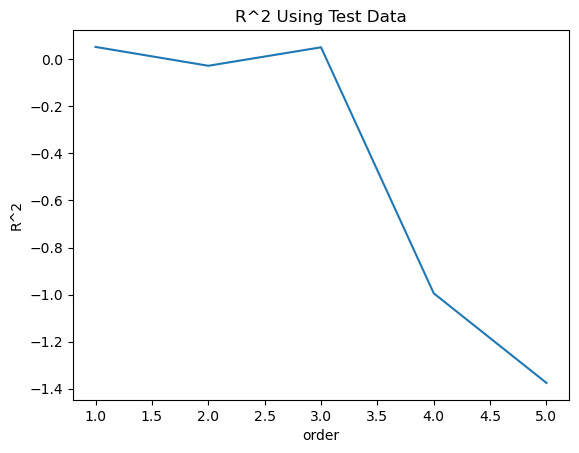

In [13]:
plt.plot(order,rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

# Task 3 : Ridge Regression

In [14]:
x_train1=xtrain[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']]
y_train1=ytrain
x_test1=xtest[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']]
y_test1=ytest

In [15]:
p=PolynomialFeatures(degree=2)

In [16]:
x_train_pr=p.fit_transform(x_train1)
x_test_pr=p.fit_transform(x_test1)

In [17]:
Alpha=np.arange(0.001,1,0.001)
rsqu_test=[]
rsqu_train=[]
pbar=tqdm(Alpha)
for alpha in pbar:
    rigemodel=Ridge(alpha=alpha)
    rigemodel.fit(x_train_pr,y_train1)
    train_score,test_score=rigemodel.score(x_train_pr,y_train1),rigemodel.score(x_test_pr,y_test1)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    rsqu_test.append(test_score)
    rsqu_train.append(train_score)

100%|██████████████████████████████████████████| 999/999 [00:03<00:00, 273.31it/s, Test Score=0.423, Train Score=0.669]


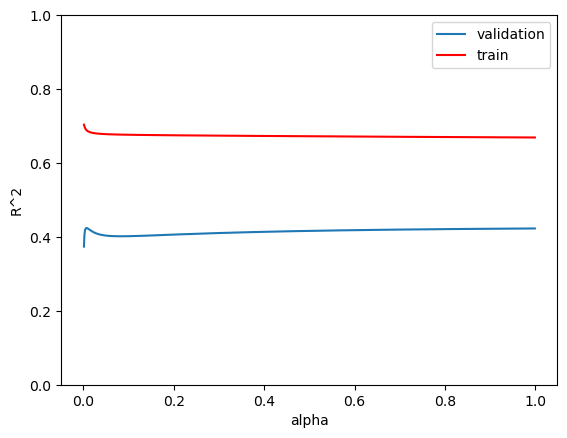

In [18]:
plt.plot(Alpha,rsqu_test,label='validation')
plt.plot(Alpha,rsqu_train,'r',label='train')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

# Grid Search

In [19]:
parameter1=[{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}]

In [20]:
rr=Ridge()
grid1=GridSearchCV(rr,parameter1,cv=4)

In [21]:
grid1.fit(x_train1,y_train1)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [23]:
bestrr=grid1.best_estimator_
bestrr

Ridge(alpha=10)

In [35]:
bestrr.score(x_test1,y_test1),bestrr.score(x_train1,y_train1)

(0.300990504869182, 0.5455944716008576)

In [49]:
from sklearn.preprocessing import StandardScaler
input=[('scalar',StandardScaler()),('model',LinearRegression())]

In [50]:
from sklearn.pipeline import Pipeline
pipe=Pipeline(input)
pipe

Pipeline(steps=[('scalar', StandardScaler()), ('model', LinearRegression())])

In [51]:
pipe.fit(x_train1,y_train1)

Pipeline(steps=[('scalar', StandardScaler()), ('model', LinearRegression())])

In [66]:
y_hat=pipe.predict(x_train1)

((119,), (119,))

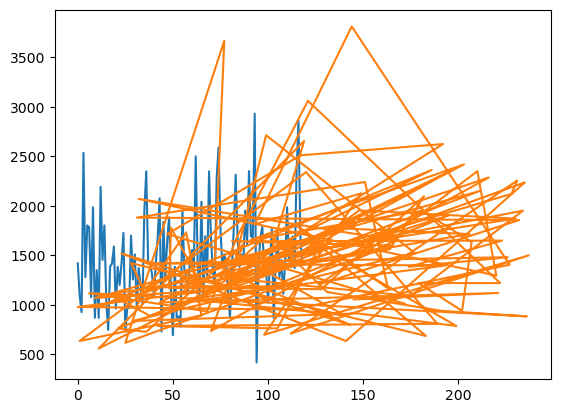

In [68]:
plt.plot(y_hat)
plt.plot(y_train1)
y_hat.shape, y_train1.shape